In [11]:
using Plots

## Andrew's case: four cuts of $\sqrt{\lambda\lambda}$-function

In [66]:
f(z) = let m1=2.9, m2 = 1, m3 = 1, m4 = 2.1
    z/(sqrt(z-(m1+m2)^2)*sqrt(z-(m1-m2)^2)*sqrt(z-(m3+m4)^2)*sqrt(z-(m3-m4)^2))
end

f (generic function with 1 method)

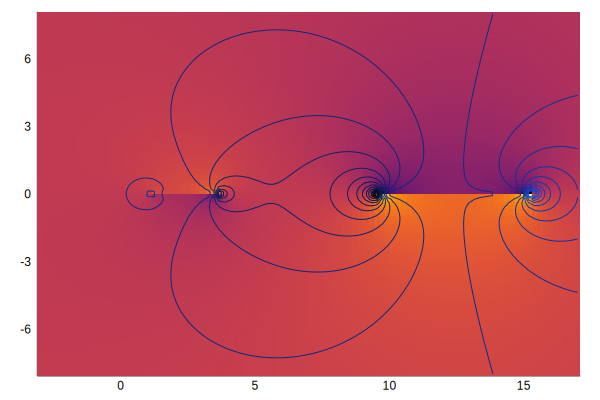

In [68]:
let sxv = linspace(-3,17,100), syv = linspace(-8,8,100)
    cal = [f(sx+1im*sy) for sy in syv, sx in sxv]
    heatmap( sxv, syv, imag.(cal))
    contour!(sxv, syv, real.(cal), seriescolor=:kb, colorbar=false, levels=30)
end

## Cesar's dispersive integral

### The dispesive representation
$$
t(s) = \frac{s-s_\mathrm{th}}{\pi}\int_{s_\mathrm{th}}^{\infty}\frac{\sqrt{1-s_\mathrm{th}/s'}}{(s'-s)(s'-s_\mathrm{th})} \mathrm{d} s'
$$

In [27]:
using QuadGK

In [35]:
t(s) = let sth = 1
    function integrand(t)
        sp = tan(t)+sth
        (s-sth)*sqrt(1-sth/sp)/(sp-s-1e-5im)/(sp-sth-1e-5im)/cos(t)^2
    end
    1/π*quadgk(t->integrand(t),0,π/2)[1]
end

t (generic function with 1 method)

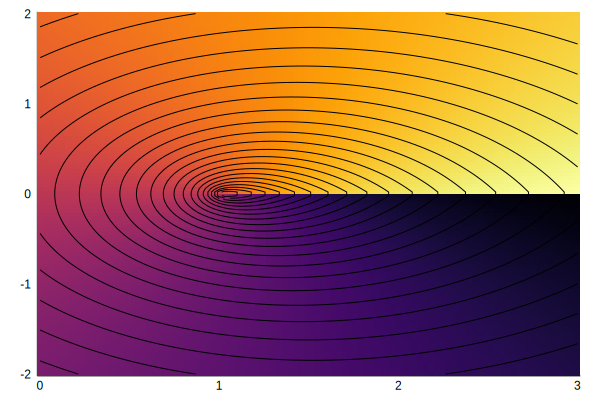

In [58]:
let sxv = linspace(0,3,100), syv = linspace(-2,2,100)
    cal = [t(sx+1im*sy) for sy in syv, sx in sxv]
    heatmap( sxv, syv, imag.(cal))
    contour!(sxv, syv, real.(cal), seriescolor=ColorGradient([:black,:black]), colorbar=false, levels=50)
end

### The solved integral
$$
h(s) = \frac{2}{\pi}\frac{(s-s_\mathrm{th})}{\sqrt{s(s_\mathrm{th}-s)}} \arctan\sqrt{\frac{s}{s_\mathrm{th}-s}}
$$

In [37]:
h(s) = let sth = 1
    (s-sth)/sqrt(s*(sth-s))*atan(sqrt(s/(sth-s)))*2/π
end

h (generic function with 1 method)

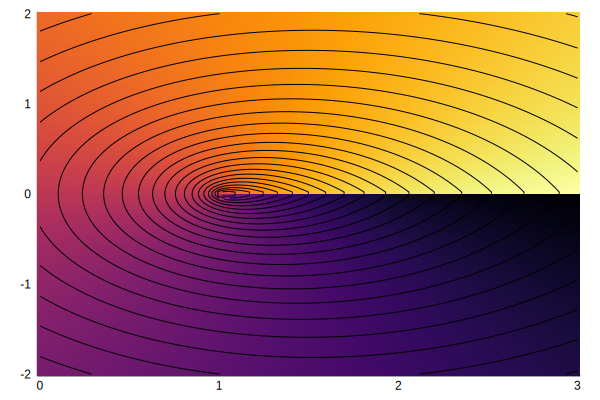

In [57]:
let sxv = linspace(0,3,100), syv = linspace(-2,2,100)
    cal = [h(sx+1im*sy) for sy in syv, sx in sxv]
    heatmap( sxv, syv, imag.(cal))
    contour!(sxv, syv, real.(cal), seriescolor=ColorGradient([:black,:black]), colorbar=false, levels=50)
end

### The second sheet: add the discontunuity
$$
h^{(II)}(s) = h^{(I)}(s) + 2i\sqrt{1-\frac{s_\mathrm{th}}{s}}
$$

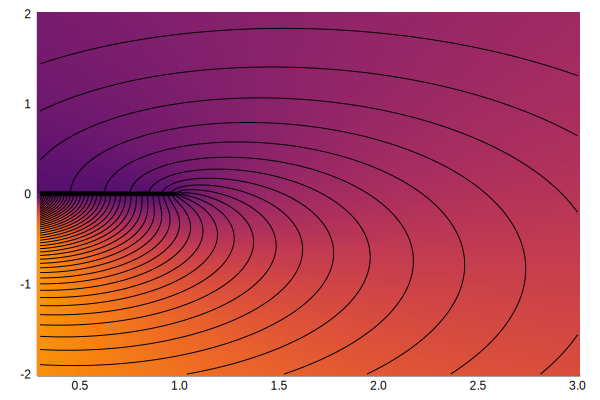

In [64]:
hII(s) = let sth=1
    h(s)+2im*sqrt(1-sth/s)
end
let sxv = linspace(0.3,3,100), syv = linspace(-2,2,100)
    cal = [(sy > 0 ? h(sx+1im*sy) : hII(sx+1im*sy)) for sy in syv, sx in sxv]
    heatmap( sxv, syv, imag.(cal))
    contour!(sxv, syv, real.(cal), seriescolor=ColorGradient([:black,:black]), colorbar=false, levels=50)
end

#### An analytical structure of the `atan`

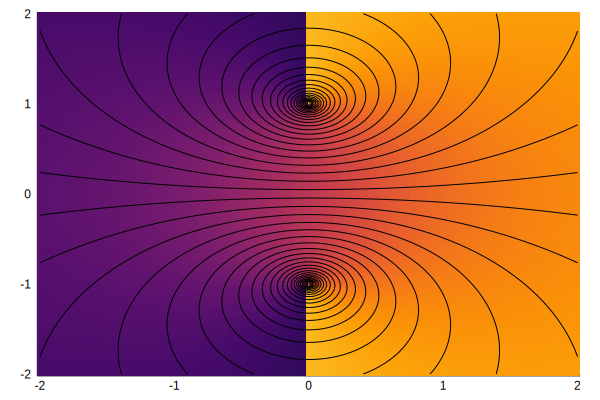

In [69]:
g(z) = atan(z)
let sxv = linspace(-2,2,99), syv = linspace(-2,2,99)
    cal = [g(sx+1im*sy) for sy in syv, sx in sxv]
    heatmap( sxv, syv, real.(cal))
    contour!(sxv, syv, imag.(cal), seriescolor=ColorGradient([:black,:black]), colorbar=false, levels=50)
end